Data Source : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
X6 = the repayment status in September, 2005; 
X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005. 

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). 
X12 = amount of bill statement in September, 2005; 
X13 = amount of bill statement in August, 2005; . . .; 
X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). 
X18 = amount paid in September, 2005; 
X19 = amount paid in August, 2005; . . .;
X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
columns = ['Amount given Credit','Gender','Education','Marital Status',
           'Age','Repayment Sep','Repayment Aug','Repayment Jul','Repayment Jun',
           'Repayment May','Repayment Apr','Amount of Bill Sep','Amount of Bill Aug',
          'Amount of Bill Jul','Amount of Bill Jun','Amount of Bill May','Amount of Bill Apr',
          'Amount Prev Pay Sep','Amount Prev Pay Aug','Amount Prev Pay Jul','Amount Prev Pay Jun','Amount Prev Pay May',
          'Amount Prev Pay Apr','Default Payment']

dfraw = pd.read_excel('default of credit card clients.xls',header=1,index_col=0)
dfraw.columns=columns

In [3]:
dfraw.head()

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount of Bill Jun,Amount of Bill May,Amount of Bill Apr,Amount Prev Pay Sep,Amount Prev Pay Aug,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
dfraw.describe()

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount of Bill Jun,Amount of Bill May,Amount of Bill Apr,Amount Prev Pay Sep,Amount Prev Pay Aug,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
repcol = ['Repayment Sep','Repayment Aug','Repayment Jul','Repayment Jun','Repayment May','Repayment Apr']
billcol = ['Amount of Bill Sep','Amount of Bill Aug','Amount of Bill Jul','Amount of Bill Jun','Amount of Bill May','Amount of Bill Apr']
amountprevcol = ['Amount Prev Pay Sep','Amount Prev Pay Aug','Amount Prev Pay Jul','Amount Prev Pay Jun','Amount Prev Pay May','Amount Prev Pay Apr']

Dividing the columns based on Repayment Late type, Bill type, and Amount Pay type

In [9]:
dfraw['Repayment Sep'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Repayment Sep, dtype: int64

I notice that there is 0,-1,-2 value in repayment columns type. So i decided to replace -2 and -1 value to 0 value to give it same meaning, pay duly.

In [10]:
dfraw[repcol] = dfraw[repcol].replace({-1:0,-2:0})

I created new feature to get total amount of Bill per customer in six months

In [12]:
def total_bill(df):
    temp = 0
    for i in billcol:
        temp+=df[i]
    return temp

dfraw['Total Bill'] = dfraw.apply(total_bill, axis=1)

Create new feature to get total payment per customer in six months

In [13]:
def total_pay(df):
    temp = 0
    for i in amountprevcol:
        temp+= df[i]
    return temp

dfraw['Total Pay'] = dfraw.apply(total_pay,axis=1)

How many times did a customer pay late?

In [14]:
def late_count(df):
    temp = 0
    for i in repcol:
        if df[i] > 0:
            temp += 1
        else:
            temp += 0
    return temp


dfraw['Count Late'] = dfraw.apply(late_count, axis=1)

What is the late payment weight for a customer per month?

In [15]:
dfraw['Mean Pay Late'] = (dfraw['Repayment Sep'] + dfraw['Repayment Aug'] + dfraw['Repayment Jul'] + dfraw['Repayment Jun'] + dfraw['Repayment May'] + dfraw['Repayment Apr'])/6

How much a customer have a unpaid Debt?

In [17]:
dfraw['Debt'] = dfraw['Total Bill'] - dfraw['Total Pay']

def positive(df):
    if df<0:
        return 0
    else:
        return df
        
dfraw['Debt'] = dfraw['Debt'].apply(positive)

In [18]:
dfraw

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment,Total Bill,Total Pay,Count Late,Mean Pay Late,Debt
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,1,7704,689,2,0.666667,7015
2,120000,2,2,2,26,0,2,0,0,0,...,1000,1000,0,2000,1,17077,5000,2,0.666667,12077
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,101653,11018,0,0.000000,90635
4,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,231334,8388,0,0.000000,222946
5,50000,1,2,1,57,0,0,0,0,0,...,10000,9000,689,679,0,109339,59049,0,0.000000,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,5003,3047,5000,1000,0,725349,42550,0,0.000000,682799
29997,150000,1,3,2,43,0,0,0,0,0,...,8998,129,0,0,0,21182,14490,0,0.000000,6692
29998,30000,1,2,2,37,4,3,2,0,0,...,22000,4200,2000,3100,1,70496,31300,3,1.500000,39196


In [62]:
dfraw['Default Payment'].value_counts()

0    23364
1     6636
Name: Default Payment, dtype: int64

In [63]:
dfraw['Education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In the feature explanation above, there is no meaning for 0,5,6 value. So i replaced that value with 4, which means 'Others'

In [19]:
dfraw['Education'] = dfraw['Education'].replace({0:4,5:4,6:4})

Same with Marital Status unexplained value, i replace it with 'Others'

In [20]:
dfraw['Marital Status'] = dfraw['Marital Status'].replace({0:3})

Now save the current data state

In [21]:
dfraw.to_csv('dfraw.csv',index=False)

In [22]:
dfraw.to_html("dataset.html",index=False) 

=========================

## Checking Multivariate Outlier

In [25]:
from mahalanobis import Mahalanobis
df_test = dfraw
df_test['mahala_pack']= Mahalanobis(np.array(df_test),len(df_test)).distances

from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)
# Mahala distance more than 9.21 is considered as outlier
# If using P-Value then the H0 is not outlier and the H1 is outlier

df_test['p-value']= 1-chi2.cdf(df_test['mahala_pack'],2)

def name_outlier(col):
    if col < 0.01:
        return 'Outlier'
    else:
        return 'Not Outlier'
df_test['Outlier']=df_test['p-value'].apply(name_outlier)
df_test

outlier_maha = df_test[df_test['Outlier']=='Outlier'].index

len(outlier_maha)

C:\Users\Sony Vaio\anaconda3\envs\MyEnvironment\lib\site-packages\mahalanobis\__init__.py:393: RuntimeWarning: invalid value encountered in sqrt
  distances_array = np.array(list(map(lambda difference: np.sqrt(np.dot(np.dot(difference, self._inv_cov_matrix), difference.reshape(-1,1))), diff_array)))
C:\Users\Sony Vaio\anaconda3\envs\MyEnvironment\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Sony Vaio\anaconda3\envs\MyEnvironment\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Sony Vaio\anaconda3\envs\MyEnvironment\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


15842

Based Mahalanobis distance, this data have 15.842 outliers (>50%) mount of the data. So i didn't delete any of them to prevent information loss.

=========================

For the purpose of EDA, i replace all categorical columns into object for better Visualization

In [37]:
df = pd.read_csv('dfraw.csv')

In [38]:
df['Gender'] = df['Gender'].replace({1:'Male',2:'Female'})

In [39]:
df['Education'] = df['Education'].replace({1:'Graduate School',2:'University',3:'High School',4:'Others'})

In [40]:
df['Marital Status'] = df['Marital Status'].replace({1:'Married',2:'Single',3:'Others'})

In [41]:
df.to_csv('df.csv',index=False)

In [42]:
df.head()

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment,Total Bill,Total Pay,Count Late,Mean Pay Late,Debt
0,20000,Female,University,Married,24,2,2,0,0,0,...,0,0,0,0,1,7704,689,2,0.666667,7015
1,120000,Female,University,Single,26,0,2,0,0,0,...,1000,1000,0,2000,1,17077,5000,2,0.666667,12077
2,90000,Female,University,Single,34,0,0,0,0,0,...,1000,1000,1000,5000,0,101653,11018,0,0.000000,90635
3,50000,Female,University,Married,37,0,0,0,0,0,...,1200,1100,1069,1000,0,231334,8388,0,0.000000,222946
4,50000,Male,University,Married,57,0,0,0,0,0,...,10000,9000,689,679,0,109339,59049,0,0.000000,50290


# EDA

## Categorical Features

Checking every categorical feature correlation with some numerical features

Female    0.207763
Male      0.241672
Name: Gender, dtype: float64


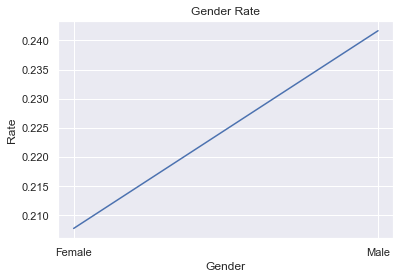

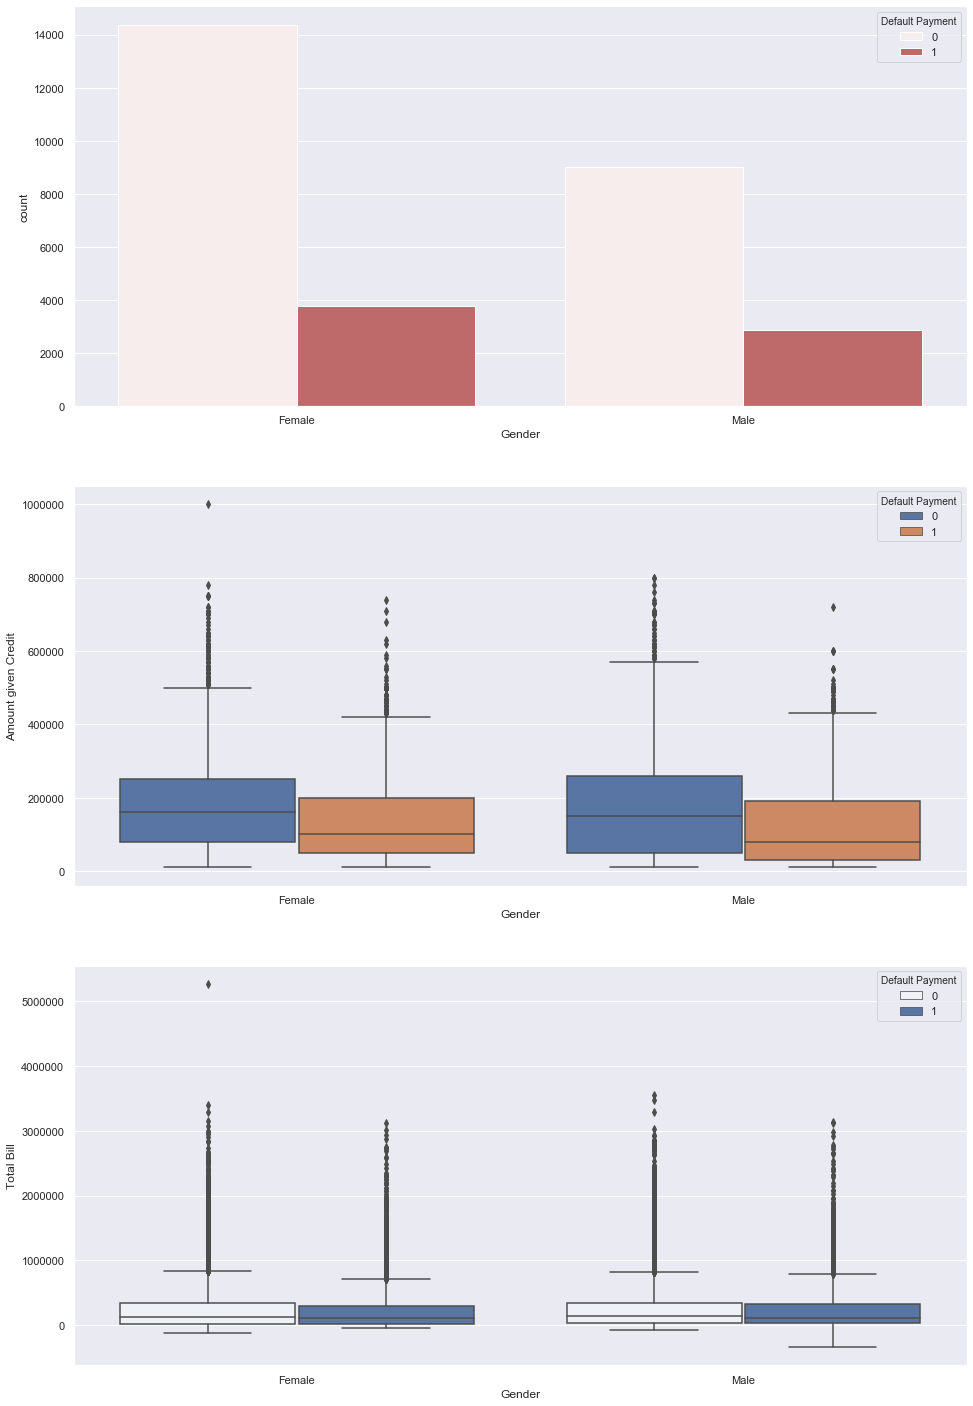

In [52]:
#gender
sns.set(style='darkgrid')

gender1 = df[df['Default Payment']==1]['Gender'].value_counts()
gender0 = df[df['Default Payment']==0]['Gender'].value_counts()

genderrate = gender1 / (gender1+gender0)
print(genderrate)


plt.plot(genderrate)
plt.title('Gender Rate')
plt.xlabel('Gender')
plt.ylabel('Rate')

f, axes = plt.subplots(3, 1,figsize=(16,25))
sns.countplot(x= 'Gender', data=df,hue='Default Payment' , orient='v' , ax=axes[0],color='indianred')
sns.boxplot(  y='Amount given Credit', x= 'Gender',hue='Default Payment', data=df, ax=axes[1])
sns.boxplot(  y='Total Bill', x= 'Gender',hue='Default Payment', data=df, ax=axes[2],color='b')
plt.savefig('1.png')

As you can see, the Default Payment rate for male is higher than female, although female Customer count is higher than male customer. Amount of given credit based on gender also give some insights that non Default Payment customer have larger amount given credit range. Also, female customer tends to get larger range from Given Credit and Total Bill.

Education Default Payment Rate
University         0.237349
Graduate School    0.192348
High School        0.251576
Others             0.070513
Name: Education, dtype: float64


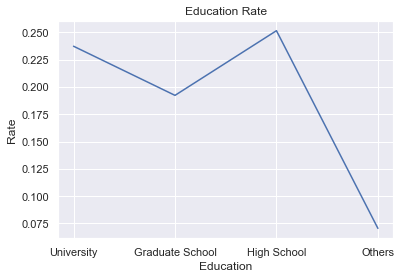

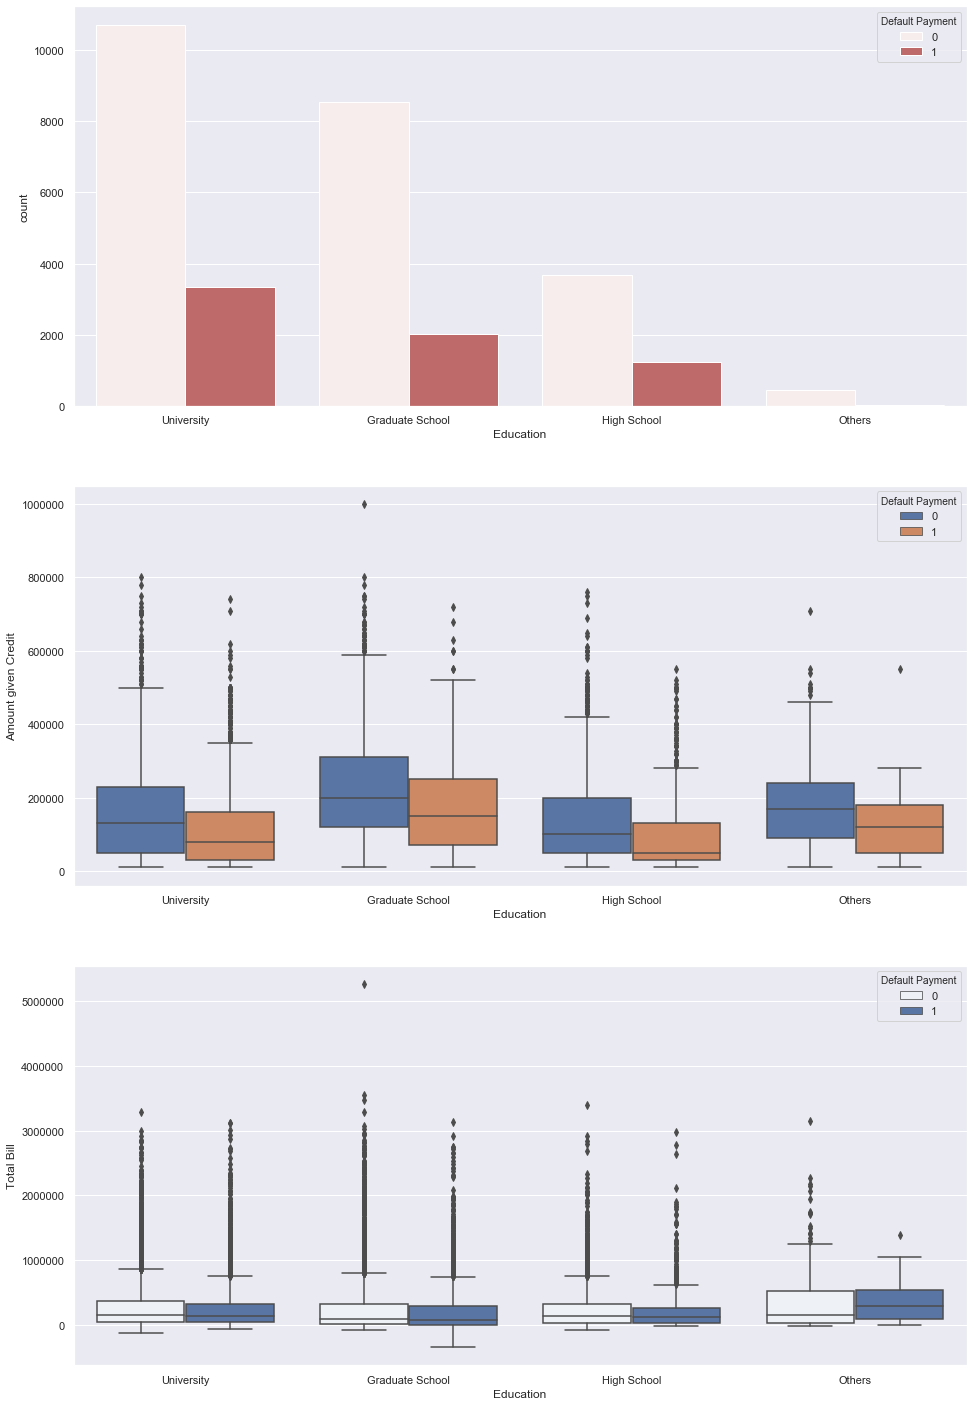

In [53]:
#education
education1 = df[df['Default Payment']==1]['Education'].value_counts()
education0 = df[df['Default Payment']==0]['Education'].value_counts()

edurate = education1 / (education1+education0)
print('Education Default Payment Rate')
print(edurate)

plt.plot(edurate)
plt.title('Education Rate')
plt.xlabel('Education')
plt.ylabel('Rate')

f, axes = plt.subplots(3, 1,figsize=(16,25))
sns.countplot(x= 'Education', data=df,hue='Default Payment' , orient='v' , ax=axes[0],color='indianred')
sns.boxplot(  y='Amount given Credit', x= 'Education',hue='Default Payment', data=df, ax=axes[1])
sns.boxplot(  y='Total Bill', x= 'Education',hue='Default Payment', data=df, ax=axes[2],color='b')

plt.savefig('2.png')

For education feature, highest rate for Default Payment customer is High School graduate.

Marital Status Default Payment Rate
Single     0.209283
Married    0.234717
Others     0.236074
Name: Marital Status, dtype: float64


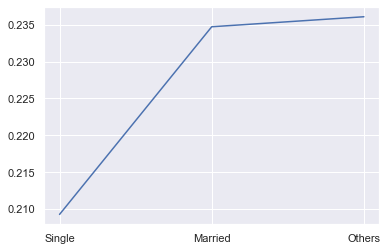

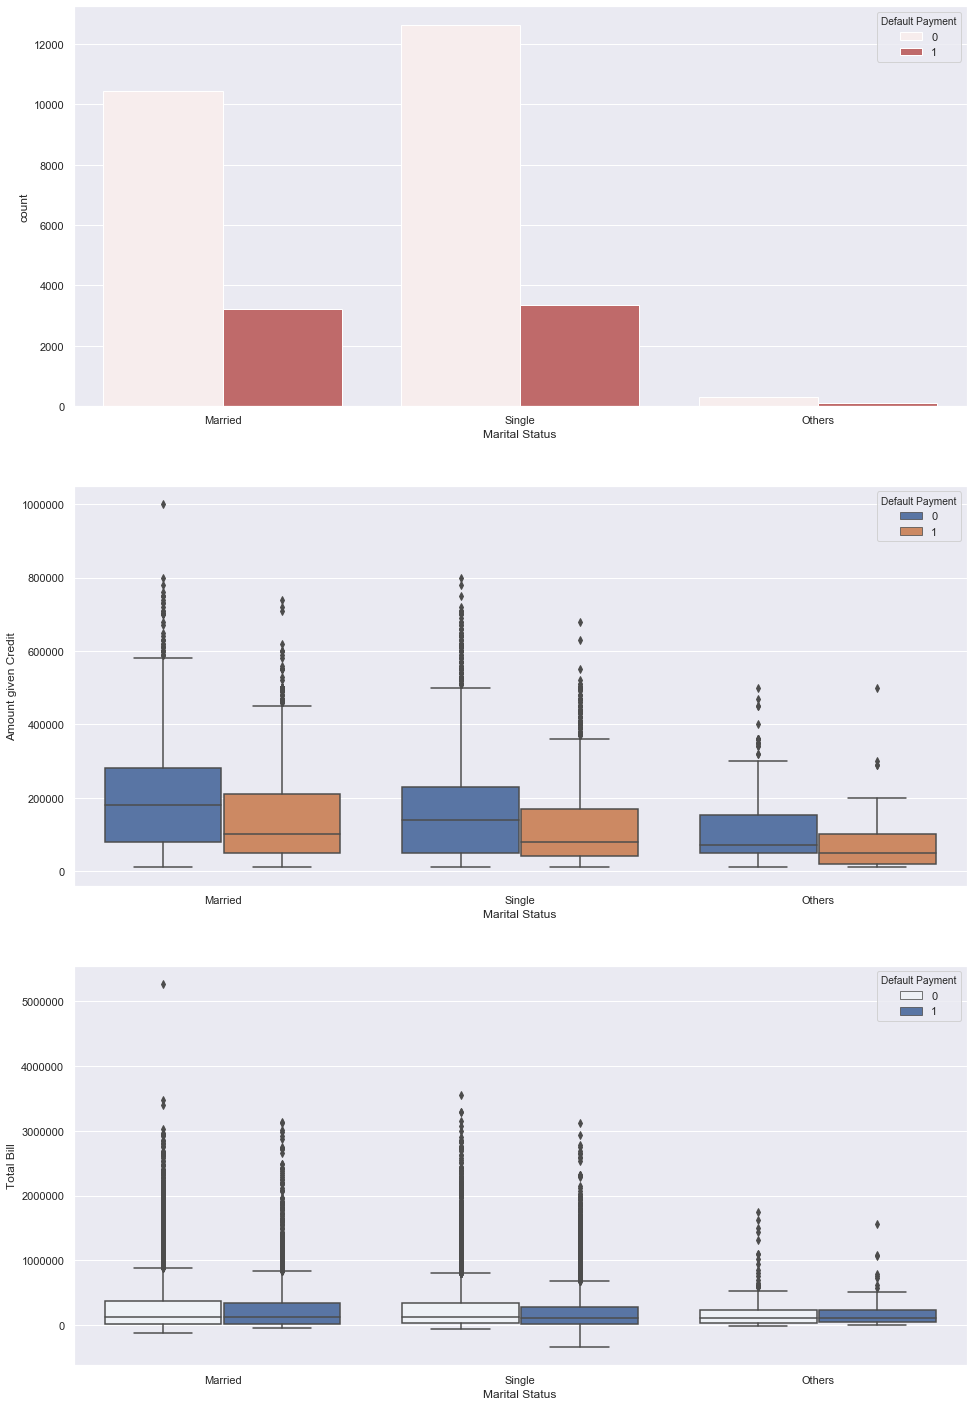

In [54]:
#marital status
marital1 = df[df['Default Payment']==1]['Marital Status'].value_counts()
marital0 = df[df['Default Payment']==0]['Marital Status'].value_counts()

maritalrate = marital1 / (marital1+marital0)
print('Marital Status Default Payment Rate')
print(maritalrate)

plt.plot(maritalrate)

f, axes = plt.subplots(3, 1,figsize=(16,25))
sns.countplot(x= 'Marital Status', data=df,hue='Default Payment' , orient='v' , ax=axes[0],color='indianred')
sns.boxplot(  y='Amount given Credit', x= 'Marital Status',hue='Default Payment', data=df, ax=axes[1])
sns.boxplot(  y='Total Bill', x= 'Marital Status',hue='Default Payment', data=df, ax=axes[2],color='b')

plt.savefig('3.png')

Customer with married and 'Others' status have higher Default Payment rate than single status. Married customer tends to have larger given credit range than other status.

## Numerical Features

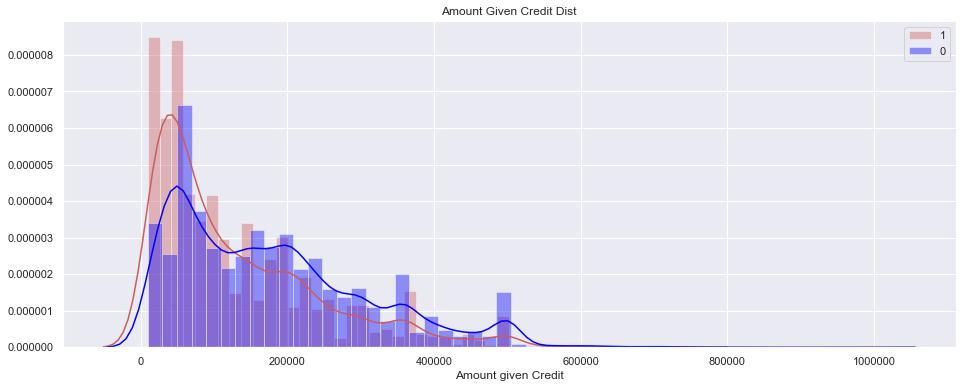

In [65]:
plt.figure(figsize=(16,6))
sns.distplot(df[df['Default Payment']==1]['Amount given Credit'],color='indianred',label=1)
sns.distplot(df[df['Default Payment']==0]['Amount given Credit'],color='blue',label=0)
plt.title('Amount Given Credit Dist')
plt.legend()
plt.savefig('4.png')

This graphs shows that Default Payment = 1 customer mostly customer with lower amount given credit.

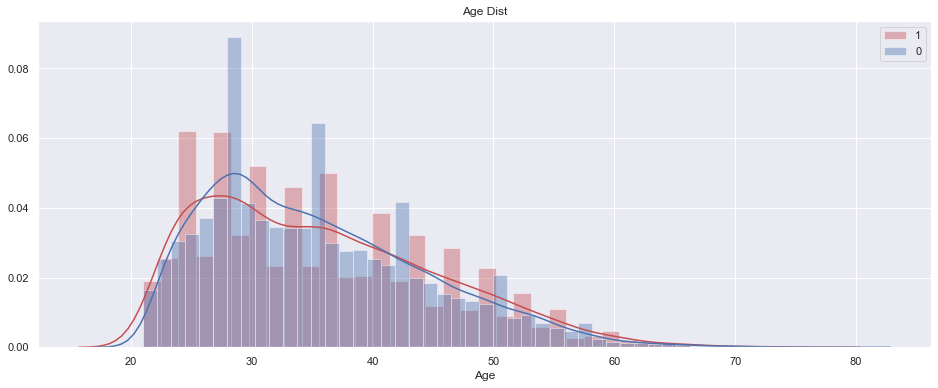

In [66]:
plt.figure(figsize=(16,6))
sns.distplot(df[df['Default Payment']==1]['Age'], color='r',label=1)
sns.distplot(df[df['Default Payment']==0]['Age'], color='b',label=0)
plt.title('Age Dist')
plt.legend()
plt.savefig('5.png')

The age distribution with Default Payment status doesn't really have characteristic for each target value.

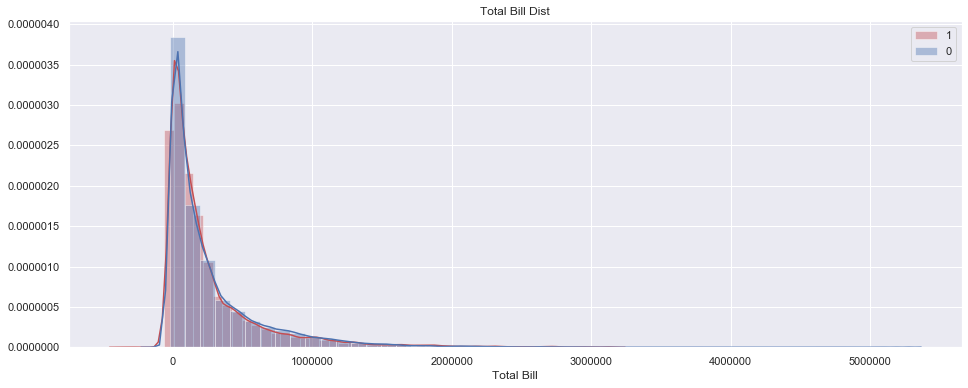

In [68]:
plt.figure(figsize=(16,6))
sns.distplot(df[df['Default Payment']==1]['Total Bill'],color='r',label=1)
sns.distplot(df[df['Default Payment']==0]['Total Bill'],color='b',label=0)
plt.title('Total Bill Dist')
plt.legend()
plt.savefig('6.png')

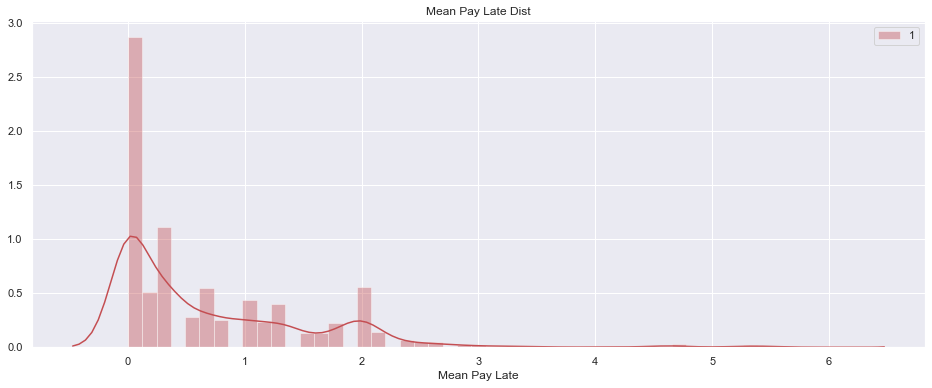

In [76]:
plt.figure(figsize=(16,6))
sns.distplot(df[df['Default Payment']==1]['Mean Pay Late'],color='r',label=1)
plt.title('Mean Pay Late Dist')
plt.legend()
plt.savefig('7.png')

I can't displot default payment == 0 for mean pay late. This because the 0 value is too much so it can't be visualize. This shows that most of the customer with Default Payment = 0 has 0 mean pay late rate.

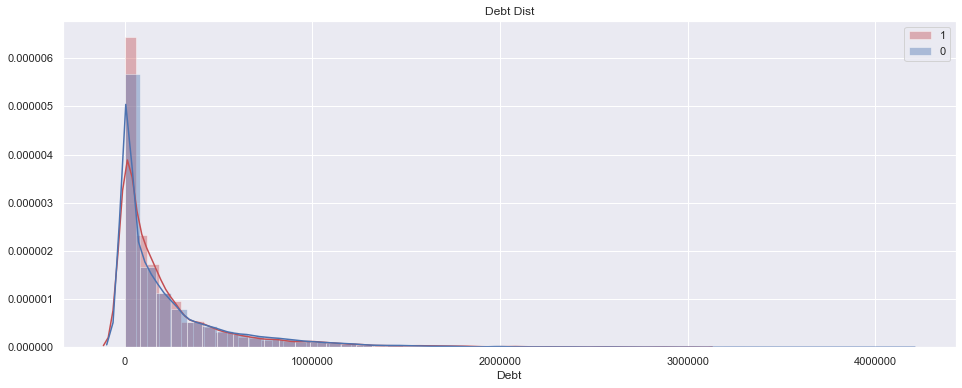

In [81]:
plt.figure(figsize=(16,6))
sns.distplot(df[df['Default Payment']==1]['Debt'],color='r',label=1)
sns.distplot(df[df['Default Payment']==0]['Debt'],color='b',label=0)
plt.title('Debt Dist')
plt.legend()
plt.savefig('8.png')

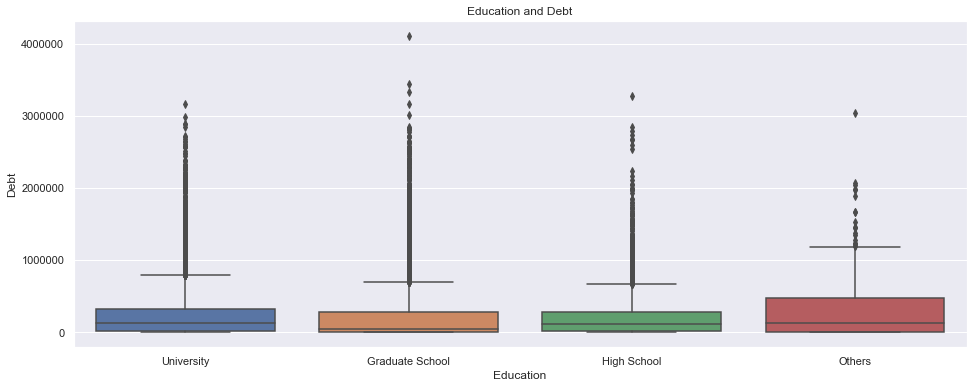

In [44]:
plt.figure(figsize=(16,6))
sns.boxplot(y=df['Debt'],x=df['Education'])
plt.title('Education and Debt')
plt.savefig('9.png')

The highest amount of Debt is a customer with Graduate School education.

## Data Preparation

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.feature_importance import mean_score_decrease
from jcopml.utils import save_model, load_model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [83]:
dfraw = pd.read_csv('dfraw.csv')

In [84]:
dfraw.head()

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment,Total Bill,Total Pay,Count Late,Mean Pay Late,Debt
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,1,7704,689,2,0.666667,7015
1,120000,2,2,2,26,0,2,0,0,0,...,1000,1000,0,2000,1,17077,5000,2,0.666667,12077
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,101653,11018,0,0.000000,90635
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,231334,8388,0,0.000000,222946
4,50000,1,2,1,57,0,0,0,0,0,...,10000,9000,689,679,0,109339,59049,0,0.000000,50290


I divide the feature into Categorical and Numerical Feature for Column Transformer Input.

In [86]:
num = ['Amount given Credit','Age','Repayment Sep', 'Repayment Aug',
       'Repayment Jul', 'Repayment Jun', 'Repayment May', 'Repayment Apr',
       'Amount of Bill Sep', 'Amount of Bill Aug', 'Amount of Bill Jul',
       'Amount of Bill Jun', 'Amount of Bill May', 'Amount of Bill Apr',
       'Amount Prev Pay Sep', 'Amount Prev Pay Aug', 'Amount Prev Pay Jul',
       'Amount Prev Pay Jun', 'Amount Prev Pay May', 'Amount Prev Pay Apr',
       'Total Bill','Total Pay','Count Late','Mean Pay Late','Debt']

cat = ['Education','Marital Status']

## Dataset Splitting

In [87]:
X = df.drop(columns='Default Payment')
y = df['Default Payment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 28), (6000, 28), (24000,), (6000,))

In this study I immediately used hyperparameter tuning using Randomized Search with parameters from jcopml

In [92]:
from sklearn.model_selection import StratifiedKFold, KFold
skf = StratifiedKFold(n_splits=4)

### 1. K-Nearest Neighbors

In [89]:
rsp.knn_params

{'algo__n_neighbors': Integer(low=1, high=40),
 'algo__weights': ['uniform', 'distance'],
 'algo__p': Real(low=1, high=2, prior='uniform')}

I'm using robust scaler for every numerical features, and one-hot encoder for every categorical features, except for gender.

My target is to get positive recall as high as possible, so for my hyperparameter scoring, i'm using 'recall'

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


{'algo__n_neighbors': 24, 'algo__p': 1.333708611139022, 'algo__weights': 'distance'}
0.9962328122056885 0.3471457892610381 0.3474001507159005
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



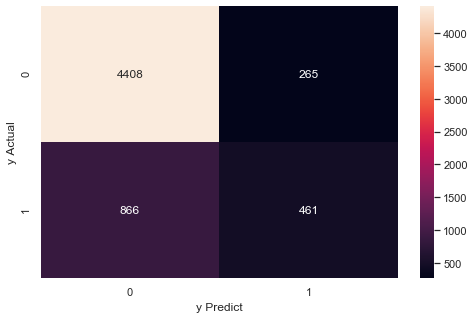

In [93]:
preprocessorknn = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), num),
    ('categoric', cat_pipe(encoder='onehot'), cat)
])

pipelineknn = Pipeline([
    ('prep', preprocessorknn),
    ('algo', KNeighborsClassifier(metric='euclidean'))
])

model1 = RandomizedSearchCV(pipelineknn, rsp.knn_params, cv=skf,scoring='recall', n_iter=5, n_jobs=-1, verbose=1, random_state=42)
model1.fit(X_train, y_train)

print(model1.best_params_)
print(model1.score(X_train, y_train), model1.best_score_, model1.score(X_test, y_test))

print(classification_report(y_test,model1.predict(X_test)))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, model1.predict(X_test)), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Predict")
plt.ylabel("y Actual")
plt.show()

### 2. Logistic Regression

In [94]:
rsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.4s finished


{'algo__C': 3.907967156822884, 'algo__fit_intercept': True}
0.3360331512525899 0.3337745764520024 0.3383571966842502
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.66      0.34      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.81      0.79      6000



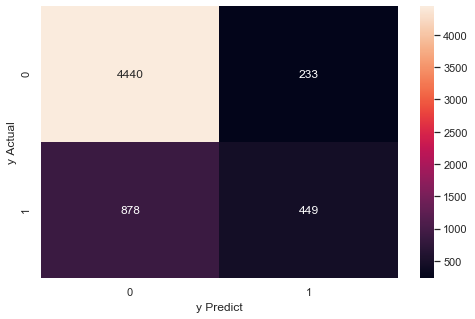

In [96]:
preprocessorlogreg = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), num),
    ('categoric', cat_pipe(encoder='onehot'), cat)
])


pipelinelogreg = Pipeline([
    ('prep', preprocessorlogreg),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


model2 = RandomizedSearchCV(pipelinelogreg, rsp.logreg_params,scoring='recall' ,cv=skf, n_iter=5, n_jobs=-1, verbose=1, random_state=42)
model2.fit(X_train, y_train)

print(model2.best_params_)
print(model2.score(X_train, y_train), model2.best_score_, model2.score(X_test, y_test))

print(classification_report(y_test,model2.predict(X_test)))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, model2.predict(X_test)), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Predict")
plt.ylabel("y Actual")
plt.show()

### 3. Random Forest Classifier

In [97]:
rsp.rf_params

{'algo__n_estimators': Integer(low=100, high=200),
 'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20)}

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.2min finished


{'algo__max_depth': 63, 'algo__max_features': 0.9446974381141753, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 163}
0.9551704652476926 0.3763448670340745 0.3677467972871138
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.37      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



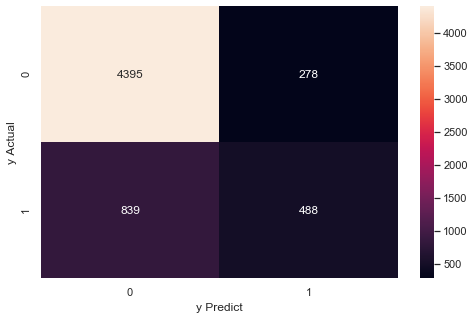

In [98]:
preprocessorrf = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), num),
    ('categoric', cat_pipe(encoder='onehot'), cat)
])

pipelinerf = Pipeline([
    ('prep', preprocessorrf),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model3 = RandomizedSearchCV(pipelinerf, rsp.rf_params, cv=skf, scoring='recall', n_iter=5, n_jobs=-1, verbose=1, random_state=42)
model3.fit(X_train, y_train)

print(model3.best_params_)
print(model3.score(X_train, y_train), model3.best_score_, model3.score(X_test, y_test))

print(classification_report(y_test,model3.predict(X_test)))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, model3.predict(X_test)), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Predict")
plt.ylabel("y Actual")
plt.show()

### 4. Support Vector Classifier

In [99]:
rsp.svm_params

{'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.5s finished
C:\Users\Sony Vaio\anaconda3\envs\MyEnvironment\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'algo__C': 0.17670169402947963, 'algo__gamma': 506.1576888752313}
0.8715388962139763 0.8461060708546317 0.8364732479276563
              precision    recall  f1-score   support

           0       0.83      0.23      0.36      4673
           1       0.24      0.84      0.37      1327

    accuracy                           0.37      6000
   macro avg       0.53      0.53      0.37      6000
weighted avg       0.70      0.37      0.36      6000



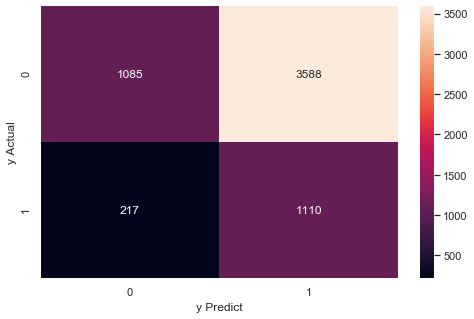

In [100]:
preprocessorsvc = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), num),
    ('categoric', cat_pipe(encoder='onehot'), cat)
])

pipelinesvc = Pipeline([
    ('prep', preprocessorsvc),
    ('algo', SVC(max_iter=500))
])

model4 = RandomizedSearchCV(pipelinesvc, rsp.svm_params, cv=skf,scoring='recall', n_iter=5, n_jobs=-1, verbose=1, random_state=42)
model4.fit(X_train, y_train)

print(model4.best_params_)
print(model4.score(X_train, y_train), model4.best_score_, model4.score(X_test, y_test))

print(classification_report(y_test,model4.predict(X_test)))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, model4.predict(X_test)), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Predict")
plt.ylabel("y Actual")
plt.show()

### 5. Xtreme Gradient Boosting

In [101]:
rsp.xgb_params

{'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   48.2s finished


{'algo__colsample_bytree': 0.9763799669573133, 'algo__gamma': 3, 'algo__learning_rate': 0.05820013372709852, 'algo__max_depth': 4, 'algo__n_estimators': 163, 'algo__reg_alpha': 0.07362945281639222, 'algo__reg_lambda': 2.752717392942944, 'algo__subsample': 0.6401537692938899}
0.3853833113580712 0.36956265151033674 0.3654860587792012
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



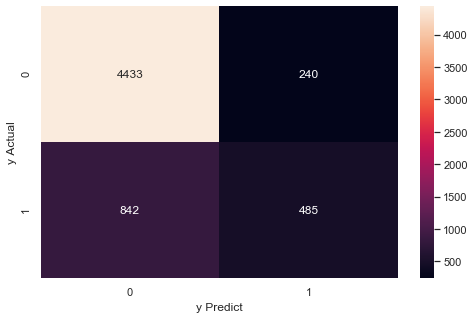

In [103]:
preprocessorxgb = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), num),
    ('categoric', cat_pipe(encoder='onehot'), cat)
])

pipelinexgb = Pipeline([
    ('prep', preprocessorxgb),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model5 = RandomizedSearchCV(pipelinexgb, rsp.xgb_params, cv=skf, scoring='recall', n_iter=5, n_jobs=-1, verbose=1, random_state=42)
model5.fit(X_train, y_train)

print(model5.best_params_)
print(model5.score(X_train, y_train), model5.best_score_, model5.score(X_test, y_test))

print(classification_report(y_test,model5.predict(X_test)))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, model5.predict(X_test)), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Predict")
plt.ylabel("y Actual")
plt.show()

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

f1_scoreKNN = f1_score(y_test, model1.predict(X_test))
f1_scoreLR = f1_score(y_test, model2.predict(X_test))
f1_scoreRF = f1_score(y_test, model3.predict(X_test))
f1_scoreSVC = f1_score(y_test, model4.predict(X_test))
f1_scoreXGB = f1_score(y_test, model5.predict(X_test))

precision_scoreKNN = precision_score(y_test, model1.predict(X_test))
precision_scoreLR = precision_score(y_test, model2.predict(X_test))
precision_scoreRF = precision_score(y_test, model3.predict(X_test))
precision_scoreSVC = precision_score(y_test, model4.predict(X_test))
precision_scoreXGB = precision_score(y_test, model5.predict(X_test))


recall_scoreKNN = recall_score(y_test, model1.predict(X_test))
recall_scoreLR = recall_score(y_test, model2.predict(X_test))
recall_scoreRF = recall_score(y_test, model3.predict(X_test))
recall_scoreSVC = recall_score(y_test, model4.predict(X_test))
recall_scoreXGB = recall_score(y_test, model5.predict(X_test))


accuracy_scoreKNN = accuracy_score(y_test, model1.predict(X_test))
accuracy_scoreLR = accuracy_score(y_test, model2.predict(X_test))
accuracy_scoreRF = accuracy_score(y_test, model3.predict(X_test))
accuracy_scoreSVC = accuracy_score(y_test, model4.predict(X_test))
accuracy_scoreXGB = accuracy_score(y_test, model5.predict(X_test))

model_scoreKNN = model1.score(X_test, y_test)
model_scoreLR = model2.score(X_test, y_test)
model_scoreRF = model3.score(X_test, y_test)
model_scoreSVC = model4.score(X_test, y_test)
model_scoreXGB = model5.score(X_test, y_test)

modeltrainKNN = model1.score(X_train, y_train)
modeltrainLR = model2.score(X_train, y_train)
modeltrainRF = model3.score(X_train, y_train)
modeltrainSVC = model4.score(X_train, y_train)
modeltrainXGB = model5.score(X_train, y_train)

scores = {'Model': ['KNearestNeighbors', 'Logistic Regression', 'Random Forest', 'SVC', 'XGBoost'],
          'Model Score Train': [modeltrainKNN, modeltrainLR, modeltrainRF, modeltrainSVC, modeltrainXGB],
          'Model Score Test' : [model_scoreKNN, model_scoreLR, model_scoreRF, model_scoreSVC, model_scoreXGB],
          'Precision Score': [precision_scoreKNN, precision_scoreLR, precision_scoreRF, precision_scoreSVC, precision_scoreXGB],
         'Recall Score' : [recall_scoreKNN, recall_scoreLR, recall_scoreRF, recall_scoreSVC, recall_scoreXGB],
          'f1 Score' : [f1_scoreKNN, f1_scoreLR, f1_scoreRF, f1_scoreSVC, f1_scoreXGB],
         'Accuracy Score' : [accuracy_scoreKNN, accuracy_scoreLR, accuracy_scoreRF, accuracy_scoreSVC, accuracy_scoreXGB]}


model_compare = pd.DataFrame(scores, columns=['Model', 'Model Score Train','Model Score Test', 'Precision Score', 'Recall Score', 'f1 Score', 'Accuracy Score'])
model_compare

,Model,Model Score Train,Model Score Test,Precision Score,Recall Score,f1 Score,Accuracy Score
0,KNearestNeighbors,0.996233,0.347400,0.634986,0.347400,0.449099,0.811500
1,Logistic Regression,0.336033,0.338357,0.658358,0.338357,0.446989,0.814833
2,Random Forest,0.955170,0.367747,0.637076,0.367747,0.466316,0.813833
3,SVC,0.871539,0.836473,0.236271,0.836473,0.368465,0.365833
4,XGBoost,0.385383,0.365486,0.668966,0.365486,0.472710,0.819667


I choose LogReg and XGBoost for my base model, because those model are not overfit (based on score).

### Try Smote to Handle Imbalance Target

In [150]:
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline

In [151]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 5309
Before OverSampling, counts of label '0': 18691 



In [152]:
sm = SMOTE(random_state = 42) 

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   17.4s finished


{'algo__C': 0.002231010801867923, 'algo__fit_intercept': False}
0.5805236391034093 0.5835372386304828 0.5591559909570459
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4673
           1       0.48      0.56      0.52      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.77      0.77      6000



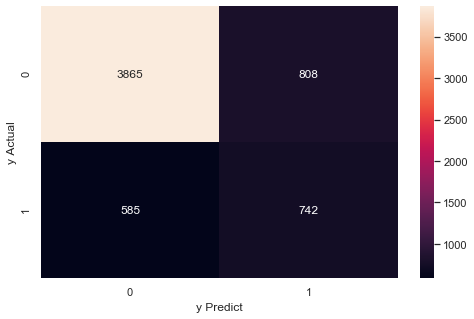

In [126]:
preprocessorlogreg = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), num),
    ('categoric', cat_pipe(encoder='onehot'), cat)
])


pipelinelogreg = Pipeline([
    ('prep', preprocessorlogreg),
    ('sampling', sm),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
    
])

model6 = RandomizedSearchCV(pipelinelogreg, rsp.logreg_params,scoring='recall' ,cv=skf, n_iter=5, n_jobs=-1, verbose=1, random_state=42)
model6.fit(X_train, y_train)

print(model6.best_params_)
print(model6.score(X_train, y_train), model6.best_score_, model6.score(X_test, y_test))

print(classification_report(y_test,model6.predict(X_test)))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, model6.predict(X_test)), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Predict")
plt.ylabel("y Actual")
plt.show()

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.5min finished


{'algo__colsample_bytree': 0.22858013612974673, 'algo__gamma': 3, 'algo__learning_rate': 0.010994335574766196, 'algo__max_depth': 2, 'algo__n_estimators': 187, 'algo__reg_alpha': 2.1368329072358785, 'algo__reg_lambda': 0.007068974950624601, 'algo__subsample': 0.3909124836035503}
0.6342060651723488 0.6381615383916979 0.5975885455915599
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4673
           1       0.45      0.60      0.51      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.69      0.67      6000
weighted avg       0.78      0.75      0.76      6000



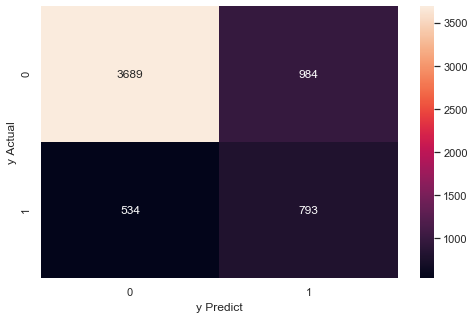

In [127]:
preprocessorxgb = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), num),
    ('categoric', cat_pipe(encoder='onehot'), cat)
])

pipelinexgb = Pipeline([
    ('prep', preprocessorxgb),
    ('sampling', sm),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model7 = RandomizedSearchCV(pipelinexgb, rsp.xgb_params, cv=skf, scoring='recall', n_iter=5, n_jobs=-1, verbose=1, random_state=42)
model7.fit(X_train, y_train)

print(model7.best_params_)
print(model7.score(X_train, y_train), model7.best_score_, model7.score(X_test, y_test))

print(classification_report(y_test,model7.predict(X_test)))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, model7.predict(X_test)), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Predict")
plt.ylabel("y Actual")
plt.show()

In [132]:
f1_scoreLRS = f1_score(y_test, model6.predict(X_test))
f1_scoreXGBS = f1_score(y_test, model7.predict(X_test))

precision_scoreLRS = precision_score(y_test, model6.predict(X_test))
precision_scoreXGBS = precision_score(y_test, model7.predict(X_test))

recall_scoreLRS = recall_score(y_test, model6.predict(X_test))
recall_scoreXGBS = recall_score(y_test, model7.predict(X_test))
                                
accuracy_scoreLRS = accuracy_score(y_test, model6.predict(X_test))
accuracy_scoreXGBS = accuracy_score(y_test, model7.predict(X_test))

model_scoreLRS = model6.score(X_test, y_test)
model_scoreXGBS = model7.score(X_test, y_test)

modeltrainLRS = model6.score(X_train, y_train)
modeltrainXGBS = model7.score(X_train, y_train)

scoress = {'Model': ['Logistic Regression','XGBoost','Logistic Regression SMOTE','XGBoost SMOTE'],
          'Model Score Train': [modeltrainLR,modeltrainXGB,modeltrainLRS,modeltrainXGBS],
          'Model Score Test' : [model_scoreLR,model_scoreXGB,model_scoreLRS,model_scoreXGBS],
          'Precision Score': [precision_scoreLR, precision_scoreXGB,precision_scoreLRS,precision_scoreXGBS],
         'Recall Score' : [recall_scoreLR, recall_scoreXGB, recall_scoreLRS, recall_scoreXGBS],
          'f1 Score' : [f1_scoreLR, f1_scoreXGB, f1_scoreLRS,f1_scoreXGBS],
         'Accuracy Score' : [accuracy_scoreLR,accuracy_scoreXGB,accuracy_scoreLRS,accuracy_scoreXGBS]}


model_compares = pd.DataFrame(scoress, columns=['Model', 'Model Score Train','Model Score Test', 'Precision Score', 'Recall Score', 'f1 Score', 'Accuracy Score'])
model_compares

,Model,Model Score Train,Model Score Test,Precision Score,Recall Score,f1 Score,Accuracy Score
0,Logistic Regression,0.336033,0.338357,0.658358,0.338357,0.446989,0.814833
1,XGBoost,0.385383,0.365486,0.668966,0.365486,0.472710,0.819667
2,Logistic Regression SMOTE,0.580524,0.559156,0.478710,0.559156,0.515815,0.767833
3,XGBoost SMOTE,0.634206,0.597589,0.446258,0.597589,0.510954,0.747000


XGBoost has better score overall than LogReg although its has lower accuracy, so i'm choosing XGBoost model for next step.

## Feature Importance

I'm using mean score decrease method, so its calculate score differences when each features get randomized.

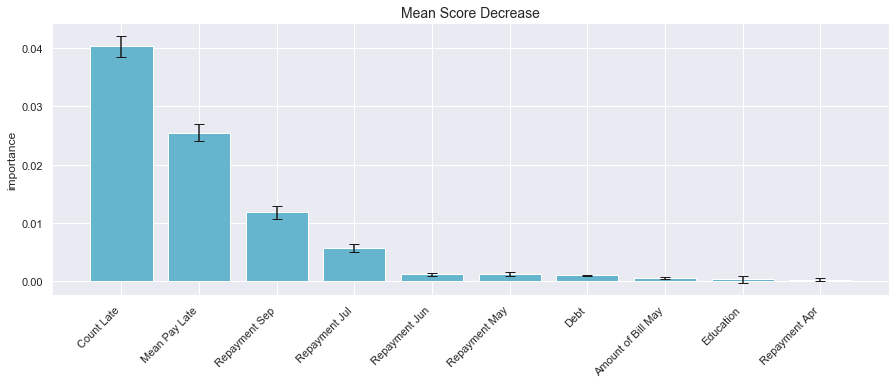

In [146]:
imp = mean_score_decrease(X_train, y_train, model7, plot=True, topk=10)

Here i choose 4 feature which gives the biggest score differences. Then i run the XGBoost using only those features.

In [147]:
X_t = X_train[['Count Late','Mean Pay Late','Repayment Sep','Repayment Jul']]
y_t = y_train

X_tes = X_test[['Count Late','Mean Pay Late','Repayment Sep','Repayment Jul']]
y_tes = y_test

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.4s finished


{'algo__colsample_bytree': 0.22858013612974673, 'algo__gamma': 3, 'algo__learning_rate': 0.010994335574766196, 'algo__max_depth': 2, 'algo__n_estimators': 187, 'algo__reg_alpha': 2.1368329072358785, 'algo__reg_lambda': 0.007068974950624601, 'algo__subsample': 0.3909124836035503}
0.6553023168204934 0.6553013580319772 0.6201959306706858
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      4673
           1       0.42      0.62      0.50      1327

    accuracy                           0.73      6000
   macro avg       0.65      0.69      0.66      6000
weighted avg       0.77      0.73      0.74      6000



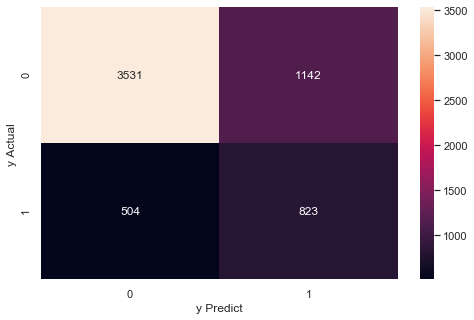

In [153]:
preprocessorxgb = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['Count Late','Mean Pay Late','Repayment Sep','Repayment Jul'])
])

pipelinexgb = Pipeline([
    ('prep', preprocessorxgb),
    ('sampling', sm),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model8 = RandomizedSearchCV(pipelinexgb, rsp.xgb_params, cv=skf, scoring='recall', n_iter=5, n_jobs=-1, verbose=1, random_state=42)
model8.fit(X_t, y_t)

print(model8.best_params_)
print(model8.score(X_t, y_t), model8.best_score_, model8.score(X_tes, y_tes))

print(classification_report(y_tes,model8.predict(X_tes)))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, model8.predict(X_tes)), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Predict")
plt.ylabel("y Actual")
plt.show()

Now checking ROC-AUC Score for every model

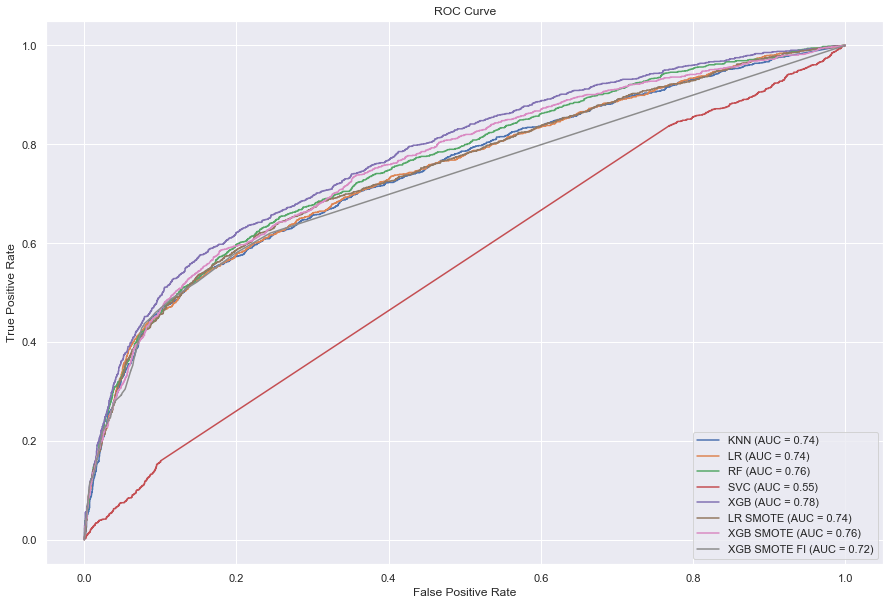

In [154]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_roc_curve, roc_auc_score, roc_curve, f1_score

plt.figure(figsize = (15,10))
ax = plt.gca()

plot_roc_curve(model1, X_test, y_test, ax=ax, name='KNN')
plot_roc_curve(model2, X_test, y_test, ax=ax, name='LR')
plot_roc_curve(model3, X_test, y_test, ax=ax, name='RF')
plot_roc_curve(model4, X_test, y_test, ax=ax, name='SVC')
plot_roc_curve(model5, X_test, y_test, ax=ax, name='XGB')
plot_roc_curve(model6, X_test, y_test, ax=ax, name='LR SMOTE')
plot_roc_curve(model7, X_test, y_test, ax=ax, name='XGB SMOTE')
plot_roc_curve(model8, X_tes, y_tes, ax=ax, name='XGB SMOTE FI')

plt.title('ROC Curve')
plt.show()

Our final model has 0.72 ROC-AUC Score, which is pretty good

## Conclusion

In [155]:
f1_scoreLRS = f1_score(y_test, model6.predict(X_test))
f1_scoreXGBS = f1_score(y_test, model7.predict(X_test))
f1_scoreXGBSFI = f1_score(y_tes, model8.predict(X_tes))

precision_scoreLRS = precision_score(y_test, model6.predict(X_test))
precision_scoreXGBS = precision_score(y_test, model7.predict(X_test))
precision_scoreXGBSFI = precision_score(y_tes, model8.predict(X_tes))

recall_scoreLRS = recall_score(y_test, model6.predict(X_test))
recall_scoreXGBS = recall_score(y_test, model7.predict(X_test))
recall_scoreXGBSFI = recall_score(y_tes, model8.predict(X_tes))
                                
accuracy_scoreLRS = accuracy_score(y_test, model6.predict(X_test))
accuracy_scoreXGBS = accuracy_score(y_test, model7.predict(X_test))
accuracy_scoreXGBSFI = accuracy_score(y_tes, model8.predict(X_tes))

model_scoreLRS = model6.score(X_test, y_test)
model_scoreXGBS = model7.score(X_test, y_test)
model_scoreXGBSFI = model8.score(X_tes, y_tes)

modeltrainLRS = model6.score(X_train, y_train)
modeltrainXGBS = model7.score(X_train, y_train)
modeltrainXGBSFI = model8.score(X_t, y_t)

scoresss = {'Model': ['Logistic Regression','XGBoost','Logistic Regression SMOTE','XGBoost SMOTE', 'XGBoost SMOTE FI'],
          'Model Score Train': [modeltrainLR,modeltrainXGB,modeltrainLRS,modeltrainXGBS, modeltrainXGBSFI],
          'Model Score Test' : [model_scoreLR,model_scoreXGB,model_scoreLRS,model_scoreXGBS, model_scoreXGBSFI],
          'Precision Score': [precision_scoreLR, precision_scoreXGB,precision_scoreLRS,precision_scoreXGBS, precision_scoreXGBSFI],
         'Recall Score' : [recall_scoreLR, recall_scoreXGB, recall_scoreLRS, recall_scoreXGBS, recall_scoreXGBSFI],
          'f1 Score' : [f1_scoreLR, f1_scoreXGB, f1_scoreLRS,f1_scoreXGBS, f1_scoreXGBSFI],
         'Accuracy Score' : [accuracy_scoreLR,accuracy_scoreXGB,accuracy_scoreLRS,accuracy_scoreXGBS, accuracy_scoreXGBSFI]}


model_comparess = pd.DataFrame(scoresss, columns=['Model', 'Model Score Train','Model Score Test', 'Precision Score', 'Recall Score', 'f1 Score', 'Accuracy Score'])
model_comparess

,Model,Model Score Train,Model Score Test,Precision Score,Recall Score,f1 Score,Accuracy Score
0,Logistic Regression,0.336033,0.338357,0.658358,0.338357,0.446989,0.814833
1,XGBoost,0.385383,0.365486,0.668966,0.365486,0.472710,0.819667
2,Logistic Regression SMOTE,0.580524,0.559156,0.478710,0.559156,0.515815,0.767833
3,XGBoost SMOTE,0.634206,0.597589,0.446258,0.597589,0.510954,0.747000
4,XGBoost SMOTE FI,0.655302,0.620196,0.418830,0.620196,0.500000,0.725667


The best model based on this study is XgBoost with SMOTE and Feature Importance. Since we aim for the highest recall score, so i choose model8 as my final model. 

The best parameters for the final model are:

'algo__colsample_bytree': 0.22858013612974673,
'algo__gamma': 3,
'algo__learning_rate': 0.010994335574766196,
'algo__max_depth': 2,
'algo__n_estimators': 187,
'algo__reg_alpha': 2.1368329072358785,
'algo__reg_lambda': 0.007068974950624601,
'algo__subsample': 0.3909124836035503

In [144]:
## Saving model

save_model(model8, "model8.pkl")

Model is pickled as model/model8.pkl


Sorry for bad english. I'm working on it!